# What is the effect of a candidate living place on voting behaviour?
#### Jelle Roelands SNR:1250812


## 1. Introduction

Every four year, local council elections are held in the Netherlands. After these elections, a new municipal council is established. After the elections, political parties form a new coalition to have a majority vote in the municipal council. This coalition mandates a new municipal board, the council of mayor and aldermen (in Dutch: college van burgemeester en wethouders). After this process, the municipal council still has controlling and legislative power to the council of mayor and aldermen.

For every election, political parties can form a list to participate. This list contains the name of the party, the number of the list and the candidates, their living place and their number on the list. The number of council members in the council, however, is limited by [law](https://wetten.overheid.nl/BWBR0005416/2019-01-01/#TiteldeelII_HoofdstukII_Artikel8). As one can see in the link, this number is depending on the number of inhabitants. For councils with [19 or more seats](https://wetten.overheid.nl/BWBR0004627/2019-01-01/#AfdelingII_HoofdstukP_Paragraaf2) to be divided, the [algorithm by d’Hondt](https://en.wikipedia.org/wiki/D%27Hondt_method) is used to divide the seats. This means that all the votes for one party are divided by real numbers and placed in order from high to low. The kth-highest values, where k is the number of seats in the municipal council, will receive a seat for that party. The persons on top of every list will be elected, unless a candidate receives a preferential vote (25% of total votes divided by seats).

\begin{equation*}
preferential \ \ vote = 25\% * \frac{total \ \ votes}{number \ \ of \ \ seats}
\end{equation*}

This paper examines the local elections in the municipality of [Hulst](https://nl.wikipedia.org/wiki/Hulst_%28gemeente%29) small, rural municipality in the south-west of the Netherlands, during 2018. The main question that will be answered is  _**what the influence is of the living place of the council-candidate on the total number of votes**_. This paper will do this by using a model created in Python, which can also be applicable to other elections with some modifications.


## 2. Descriptive statistics

### 2.1 Demography

In this section, demographics of the municipality will be discussed. Since we cannot assign characteristics to each voters, due to the secrecy of voting, it is impossible to assign these characteristics to an individual voter. It is highly assumable that these characteristics might influence the party or person one vote for. One could instead choose to assign average characteristics to each visitor of the voting bureau. For reasons that will become clear in section 2.3.1, this method is not used. Instead, an overview of characteristics of each town (in CBS-language: 'wijk') is given, as provided by the [dutch statistic bureau](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/wijk-en-buurtstatistieken/kerncijfers-wijken-en-buurten-2004-2018). Besides from being informative, these statistics will be useful in other sections.

![](map%20hulst.jpg)
1. Hulst
2. Sint Jansteen
3. Clinge
4. Graauw
5. Heikant
6. Nieuw-Namen
7. Kapellebrug
8. Kloosterzande
9. Lamswaarde
10. Terhole
11. Vogelwaarde
12. Hengstdijk
13. Ossenisse

#### 2.1.1. Inhabitants

In the follwing graph, the number of inhabitants in each town is shown. As we can see, Hulst is the largest city  with 10935 inhabitants, followed by Kloosterzande and Sint Jansteen with 3175 and 3325 inhabitants respectively. All numbers in this graph are rounded to 5.

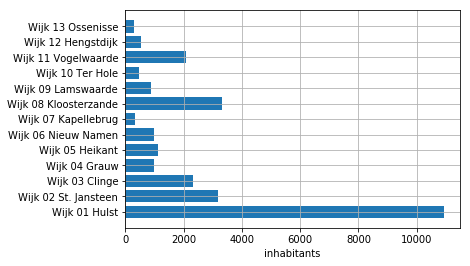

,a_inw
regio,
Wijk 01 Hulst,10935
Wijk 02 St. Jansteen,3175
Wijk 03 Clinge,2335
Wijk 04 Grauw,975
Wijk 05 Heikant,1110
Wijk 06 Nieuw Namen,995
Wijk 07 Kapellebrug,320
Wijk 08 Kloosterzande,3325
Wijk 09 Lamswaarde,885


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sta=pd.read_csv('cbs1.csv', delimiter=';', index_col=2)
inh=sta.iloc[:,[6]].values
nwijk=np.arange(len(inh))
plt.barh(nwijk, inh)
plt.yticks(nwijk, sta.index)
plt.grid()
plt.xlabel('inhabitants')
plt.show()
sta.iloc[:,[6]]

#### 2.1.2. Distribution by age

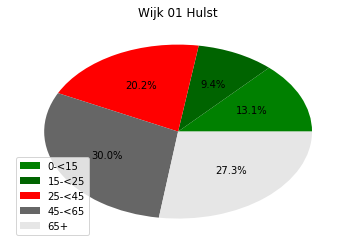

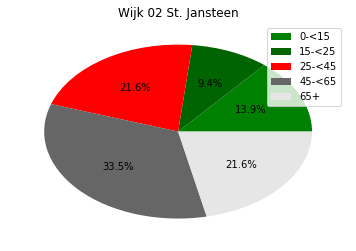

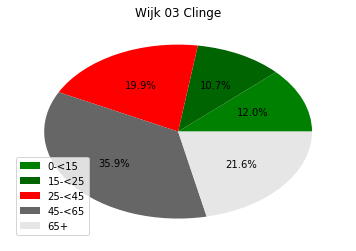

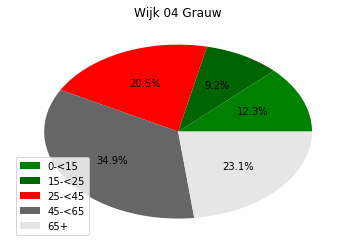

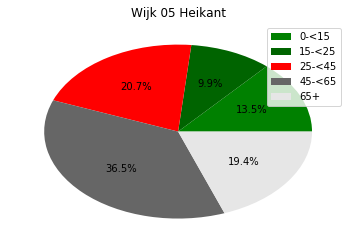

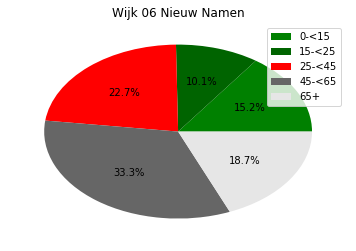

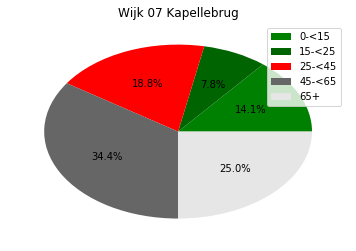

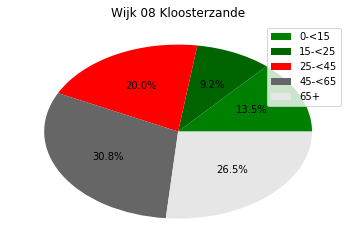

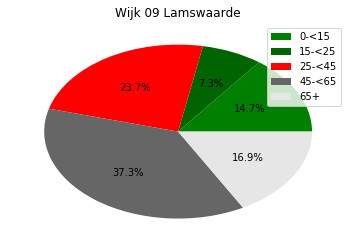

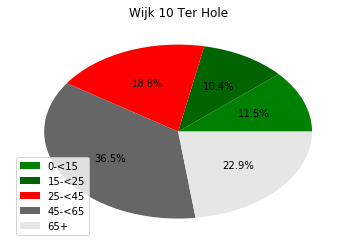

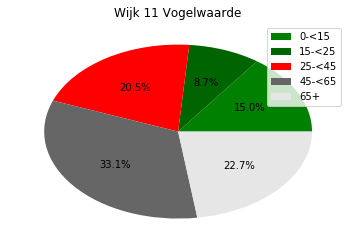

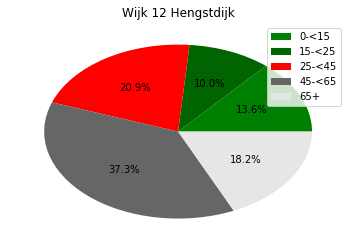

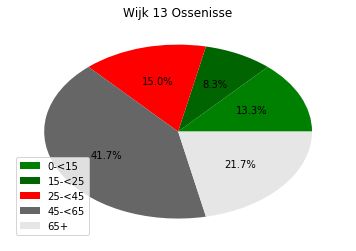

In [2]:
def p(i):
    return sta.iloc[i,9:14].values
titles = sta.index
labels = ['0-<15','15-<25','25-<45','45-<65','65+']
for i in range(0,13):
    plt.figure(i)
    plt.pie(p(i), colors=("g", '#006400','r','0.4','0.90'), autopct='%1.1f%%')
    plt.legend(labels)
    plt.title(titles[i])  
plt.show()

#### 2.1.3. Income and poverty

*Since no statistics of 2018 were available, the latest statistics by the CBS have been used (2015*

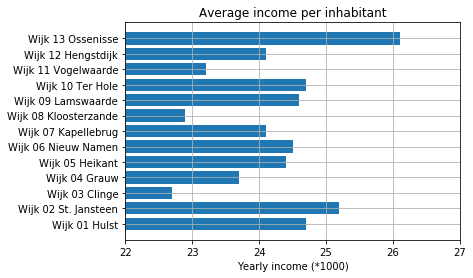

In [3]:
sta2015=pd.read_csv('cbs2015.csv', delimiter=';', index_col=2)
y=sta2015.iloc[:,[67]].values
plt.barh(nwijk, y)
plt.yticks(nwijk, sta.index)
plt.axis(xmin=22, xmax=27)
plt.title('Average income per inhabitant')
plt.xlabel('Yearly income (*1000)')
plt.grid()
plt.show()

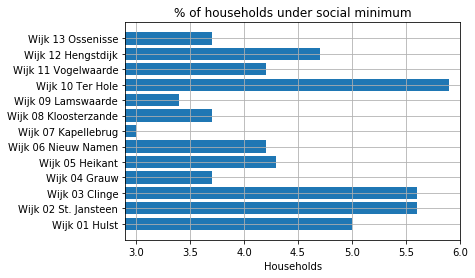

In [4]:
y=sta2015.iloc[:,[74]].values
plt.barh(nwijk, y)
plt.yticks(nwijk, sta2015.index)
plt.title('% of households under social minimum')
plt.xlabel('Households')
plt.axis(xmin=2.9, xmax=6)
plt.grid()
plt.show()

### 2.2 Candidates

In the next section, the candidates for the elections in 2018 will be examined. All the names of the candidates are printed on the voting bill, together with their living place (based on ZIP code) and the political party they represent. Before the elections, this was also published [on the website of the municipality Hulst.](https://publiek.pagefreezer.nl/browse/Website%20gemeente%20Hulst/01-03-2018T06:40/https://www.gemeentehulst.nl/de_Gemeente/Gemeenteraad/Gemeenteraadsverkiezingen/Kandidatenlijsten). We will first examine the candidates per 1000 inhabitants in the towns as administrated by the CBS. Since Kuitaart and Walsoorden do have their own ZIP-code, but are not a town, those were add to the town they belong to (respectively Kloosterzande and Lamswaarde). In the second part, we will examine the number of candidates per party.

### 2.2.1 Candidates per 1000 inhabitants

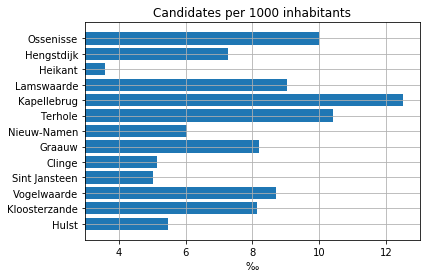

In [5]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
lp=uitslag['Woonplaats'].value_counts()
lp=pd.DataFrame(lp)
lp=lp.rename(columns={'Woonplaats':'livingplace'})
lp.loc["Kloosterzande"]=lp.loc["Kloosterzande"]+lp.loc["Walsoorden"]
lp=lp.drop('Walsoorden')
lp.loc['Lamswaarde']=lp.loc['Lamswaarde']+lp.loc['Kuitaart']
lp=lp.drop('Kuitaart')
lp=lp.drop(['Zaamslag', 'Vlissingen', 'Koewacht'])
inh= pd.DataFrame(inh)
villages=['Hulst', 'Sint Jansteen', 'Clinge', 'Graauw', 'Heikant', 'Nieuw-Namen','Kapellebrug', 'Kloosterzande', "Lamswaarde", "Terhole", 'Vogelwaarde', 'Hengstdijk', 'Ossenisse']
for i in range(0,13):
    inh=inh.rename(index={i:villages[i]})
lp=lp.merge(inh, left_index=True, right_index=True)
lp=lp.rename(columns={0:'inhabitants'})
lp['candidatesper1000']=lp.livingplace/lp.inhabitants*1000
cpt=lp.candidatesper1000.values
ncpt=np.arange(len(cpt))
plt.barh(ncpt, cpt)
plt.yticks(ncpt, lp.index)
plt.title('Candidates per 1000 inhabitants')
plt.xlabel('‰')
plt.axis(xmin=3, xmax=13)
plt.grid()
plt.show()

### 2.2.2. Candidates per party

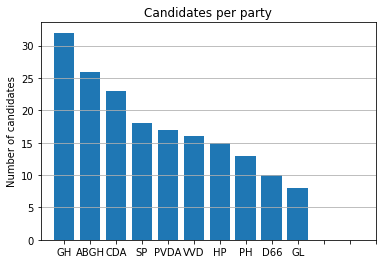

,Party
GH,32
ABGH,26
CDA,23
SP,18
PVDA,17
VVD,16
HP,15
PH,13
D66,10
GL,8


In [6]:
lp=uitslag['Partij'].value_counts()
lp=pd.DataFrame(lp)
lp=lp.rename(columns={'Partij':'Party'})
lpa=lp.Party.values
nlpa=np.arange(len(lp))
plt.bar(nlpa, lpa)
plt.xticks(ncpt, lp.index)
plt.title('Candidates per party')
plt.ylabel('Number of candidates')
plt.grid(axis='y')
plt.show()
lp

### 2.3 Elections

In this section, the outcome of the 2018 elections will be discussed. As already pointed out in the introduction section, seats for the council are granted by the highest quotients of every party, the so-called 'd'Hondt-algoritm. The raw data (in PDF) on the outcome of the elections can be found [here](https://docs.wixstatic.com/ugd/87eac3_2d145ba3e77745528f3b3aad6bad2f5e.pdf).

During the 2018 election, there were 15 different voting bureaus in the municipallity of Hulst. 4 of them (ST1, ST2, ST3 and ST4) where located in the biggest town, Hulst. The others were located in the smaller villages Clinge, Nieuw-Namen, Graauw, Sint Jansteen, Heikant, Kloosterzande, Lamswaarde, Terhole, Vogelwaarde, Ossenisse and Hengstdijk (respectively ST6 until ST15).

In [7]:
##This code does not work, because I was unable to import Basemap. However, it will work on a computer where Basemap is installed.
## Therefore, I have plotted the outcome as a picture I made with Anaconda, I was unable to make the labels and therefore did this with MS Paint.
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
coo=pd.read_csv('C:\Users\Jelle Roelants\Documents\Coordinaten.csv', delimiter=';', index_col=0)
m = Basemap(projection='mill', llcrnrlat=51.213918, urcrnrlat=51.426835,llcrnrlon=3.927361, urcrnrlon=4.247356, resolution='h')
lat = coo.iloc[:,[0]]
lon = coo.iloc[:,[1]]
lat=lat.values
lon=lon.values
m.plot(x=lon, y=lat, latlon=True, linewidth=0, marker='o')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents()
m.drawmapboundary()
plt.title('Voting bureaus')
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-7-ba57602261ba>, line 7)

![](hulst stembureaus.jpg)

#### 2.3.1 Electoral turnout


A few weeks before the election starts, every citizen who is allowed to vote will receive a letter with a call to vote. This letter, in combination with showing a valid pasport, allows the citizen to vote. Also, this letter points out the voting station which is closest to the address of the citizen. However, one can vote in every voting bureau in their municipal he or she wishes. The number of letters sent by the government is the number of total calls. Together with the actual casted votes, the percentage of electoral turnout can be computed as follows:

\begin{equation*}
Electoral \ \ turnout = \frac{votes}{calls}
\end{equation*}

The electoral turnout will first be examined. The electoral turnout of every voting bureau is an estimation, since it is not mandatory to vote at the reccomended bureau.

Note that the own administration of the municipality also includes blanco and non-valid votes in the nominator when establishing the electoral turnout. Since these votes are not actual casted, we do not include them in this section. The actual number of non-valid votes was 63 and the blanco votes 35, distributed morealess equal over all voting bureaus.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
calls=pd.read_csv('Calls.csv', delimiter=';', index_col=0)
calls.insert(2,"Electoral turnout in %", calls.Votes/calls.Calls*100)
calls

,Votes,Calls,Electoral turnout in %
Voting bureau,,,
ST1,1862,2523,73.801031
ST2,937,1395,67.168459
ST3,1414,2314,61.106309
ST4,998,2751,36.277717
ST5,907,1962,46.228338
ST6,332,808,41.089109
ST7,495,783,63.218391
ST8,1463,2842,51.477833
ST9,575,1080,53.240741


#### 2.3.2 Total

First, the new municipality council is calculated based on the d'Hondt algoritm. This is equal to the total outcome of votes in the municipality of Hulst. Then, an equal calculation is done for every town or village in the municipality in Hulst. The four election bureaus called ST1, ST2, ST3 and ST4 in the city of Hulst are taken together in these calculations, because they are very close to each other. The calculations give a good representation of the voting behaviour in that village, although such councils are still hypothetical.

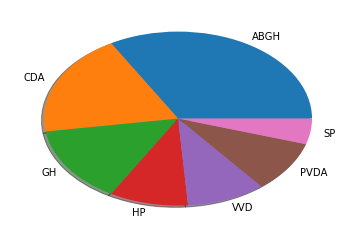

ABGH    7
CDA     4
GH      3
HP      2
VVD     2
PVDA    2
SP      1
Name: Partij, dtype: int64


In [9]:
#Importing the csv file
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 1)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
#create dummies for parties
dummies = pd.get_dummies(uitslag['Partij'])
uitslag = uitslag.merge(dummies, left_index=True, right_index= True)
#Adding up all the votes for each Party
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.Totaal[uitslag.ABGH==1].sum(),uitslag.Totaal[uitslag.CDA==1].sum(),uitslag.Totaal[uitslag.PH==1].sum(),uitslag.Totaal[uitslag.GH==1].sum(),uitslag.Totaal[uitslag.PVDA==1].sum(),uitslag.Totaal[uitslag.VVD==1].sum(),uitslag.Totaal[uitslag.SP==1].sum(),uitslag.Totaal[uitslag.HP==1].sum(),uitslag.Totaal[uitslag.GL==1].sum(),uitslag.Totaal[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
#Defining the number of seats
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    #Add columns with divisions by any real number as long as 
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    #Make one dataframe with column party and respective divisions
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
#Defining the seats for every party
zetels= quotient.nlargest(seats,'quotient', keep='first')
#Defining the number of seats per party
zetelverdeling=zetels['Partij'].value_counts()
#Create a pie chart
labels= zetelverdeling.index
ax=plt.pie(zetelverdeling, labels=labels, shadow=True)
#Printing the election outcome
plt.show()
print(zetelverdeling)

#### 2.3.3. Hulst

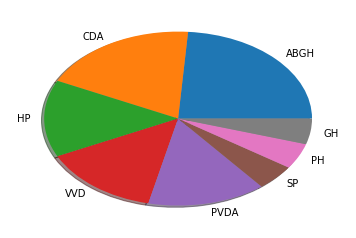

ABGH    5
CDA     4
HP      3
VVD     3
PVDA    3
SP      1
PH      1
GH      1
Name: Partij, dtype: int64


In [10]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.Hulst[uitslag.ABGH==1].sum(),uitslag.Hulst[uitslag.CDA==1].sum(),uitslag.Hulst[uitslag.PH==1].sum(),uitslag.Hulst[uitslag.GH==1].sum(),uitslag.Hulst[uitslag.PVDA==1].sum(),uitslag.Hulst[uitslag.VVD==1].sum(),uitslag.Hulst[uitslag.SP==1].sum(),uitslag.Hulst[uitslag.HP==1].sum(),uitslag.Hulst[uitslag.GL==1].sum(),uitslag.Hulst[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.4 Clinge

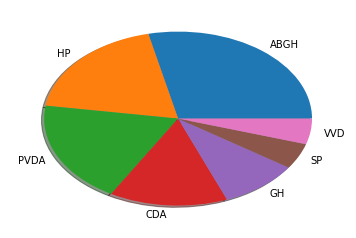

ABGH    6
HP      4
PVDA    4
CDA     3
GH      2
SP      1
VVD     1
Name: Partij, dtype: int64


In [11]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST5[uitslag.ABGH==1].sum(),uitslag.ST5[uitslag.CDA==1].sum(),uitslag.ST5[uitslag.PH==1].sum(),uitslag.ST5[uitslag.GH==1].sum(),uitslag.ST5[uitslag.PVDA==1].sum(),uitslag.ST5[uitslag.VVD==1].sum(),uitslag.ST5[uitslag.SP==1].sum(),uitslag.ST5[uitslag.HP==1].sum(),uitslag.ST5[uitslag.GL==1].sum(),uitslag.ST5[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.5. Nieuw-Namen


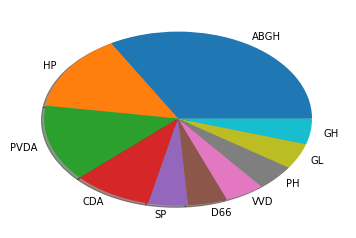

ABGH    7
HP      3
PVDA    3
CDA     2
SP      1
D66     1
VVD     1
PH      1
GL      1
GH      1
Name: Partij, dtype: int64


In [12]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST6[uitslag.ABGH==1].sum(),uitslag.ST6[uitslag.CDA==1].sum(),uitslag.ST6[uitslag.PH==1].sum(),uitslag.ST6[uitslag.GH==1].sum(),uitslag.ST6[uitslag.PVDA==1].sum(),uitslag.ST6[uitslag.VVD==1].sum(),uitslag.ST6[uitslag.SP==1].sum(),uitslag.ST6[uitslag.HP==1].sum(),uitslag.ST6[uitslag.GL==1].sum(),uitslag.ST6[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.6. Graauw

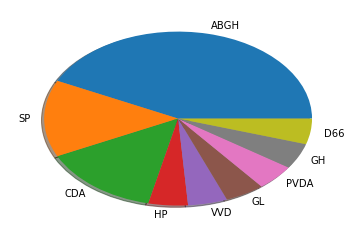

ABGH    9
SP      3
CDA     3
HP      1
VVD     1
GL      1
PVDA    1
GH      1
D66     1
Name: Partij, dtype: int64


In [13]:
uitslag=uitslag.rename(columns={'ST 7':'ST7'})
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST7[uitslag.ABGH==1].sum(),uitslag.ST7[uitslag.CDA==1].sum(),uitslag.ST7[uitslag.PH==1].sum(),uitslag.ST7[uitslag.GH==1].sum(),uitslag.ST7[uitslag.PVDA==1].sum(),uitslag.ST7[uitslag.VVD==1].sum(),uitslag.ST7[uitslag.SP==1].sum(),uitslag.ST7[uitslag.HP==1].sum(),uitslag.ST7[uitslag.GL==1].sum(),uitslag.ST7[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.7. Sint Jansteen

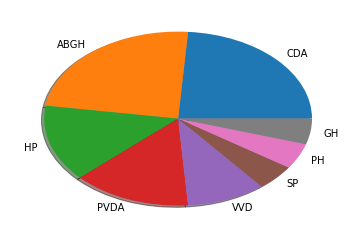

CDA     5
ABGH    5
HP      3
PVDA    3
VVD     2
SP      1
PH      1
GH      1
Name: Partij, dtype: int64


In [14]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST8[uitslag.ABGH==1].sum(),uitslag.ST8[uitslag.CDA==1].sum(),uitslag.ST8[uitslag.PH==1].sum(),uitslag.ST8[uitslag.GH==1].sum(),uitslag.ST8[uitslag.PVDA==1].sum(),uitslag.ST8[uitslag.VVD==1].sum(),uitslag.ST8[uitslag.SP==1].sum(),uitslag.ST8[uitslag.HP==1].sum(),uitslag.ST8[uitslag.GL==1].sum(),uitslag.ST8[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.8. Heikant

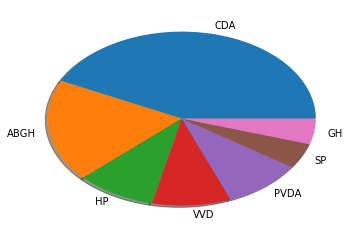

CDA     9
ABGH    4
HP      2
VVD     2
PVDA    2
SP      1
GH      1
Name: Partij, dtype: int64


In [15]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST9[uitslag.ABGH==1].sum(),uitslag.ST9[uitslag.CDA==1].sum(),uitslag.ST9[uitslag.PH==1].sum(),uitslag.ST9[uitslag.GH==1].sum(),uitslag.ST9[uitslag.PVDA==1].sum(),uitslag.ST9[uitslag.VVD==1].sum(),uitslag.ST9[uitslag.SP==1].sum(),uitslag.ST9[uitslag.HP==1].sum(),uitslag.ST9[uitslag.GL==1].sum(),uitslag.ST9[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.9. Kloosterzande

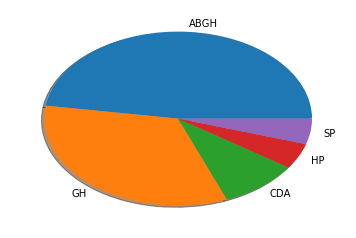

ABGH    10
GH       7
CDA      2
HP       1
SP       1
Name: Partij, dtype: int64


In [16]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST10[uitslag.ABGH==1].sum(),uitslag.ST10[uitslag.CDA==1].sum(),uitslag.ST10[uitslag.PH==1].sum(),uitslag.ST10[uitslag.GH==1].sum(),uitslag.ST10[uitslag.PVDA==1].sum(),uitslag.ST10[uitslag.VVD==1].sum(),uitslag.ST10[uitslag.SP==1].sum(),uitslag.ST10[uitslag.HP==1].sum(),uitslag.ST10[uitslag.GL==1].sum(),uitslag.ST10[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.10. Lamswaarde

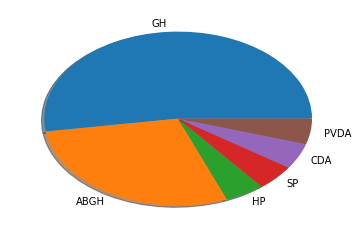

GH      11
ABGH     6
HP       1
SP       1
CDA      1
PVDA     1
Name: Partij, dtype: int64


In [17]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST11[uitslag.ABGH==1].sum(),uitslag.ST11[uitslag.CDA==1].sum(),uitslag.ST11[uitslag.PH==1].sum(),uitslag.ST11[uitslag.GH==1].sum(),uitslag.ST11[uitslag.PVDA==1].sum(),uitslag.ST11[uitslag.VVD==1].sum(),uitslag.ST11[uitslag.SP==1].sum(),uitslag.ST11[uitslag.HP==1].sum(),uitslag.ST11[uitslag.GL==1].sum(),uitslag.ST11[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.11. Terhole

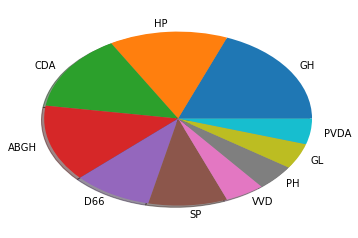

GH      4
HP      3
CDA     3
ABGH    3
D66     2
SP      2
VVD     1
PH      1
GL      1
PVDA    1
Name: Partij, dtype: int64


In [18]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST12[uitslag.ABGH==1].sum(),uitslag.ST12[uitslag.CDA==1].sum(),uitslag.ST12[uitslag.PH==1].sum(),uitslag.ST12[uitslag.GH==1].sum(),uitslag.ST12[uitslag.PVDA==1].sum(),uitslag.ST12[uitslag.VVD==1].sum(),uitslag.ST12[uitslag.SP==1].sum(),uitslag.ST12[uitslag.HP==1].sum(),uitslag.ST12[uitslag.GL==1].sum(),uitslag.ST12[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.12. Vogelwaarde

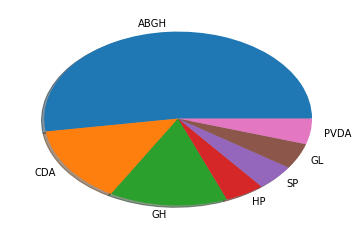

ABGH    11
CDA      3
GH       3
HP       1
SP       1
GL       1
PVDA     1
Name: Partij, dtype: int64


In [19]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST13[uitslag.ABGH==1].sum(),uitslag.ST13[uitslag.CDA==1].sum(),uitslag.ST13[uitslag.PH==1].sum(),uitslag.ST13[uitslag.GH==1].sum(),uitslag.ST13[uitslag.PVDA==1].sum(),uitslag.ST13[uitslag.VVD==1].sum(),uitslag.ST13[uitslag.SP==1].sum(),uitslag.ST13[uitslag.HP==1].sum(),uitslag.ST13[uitslag.GL==1].sum(),uitslag.ST13[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.13. Ossenisse

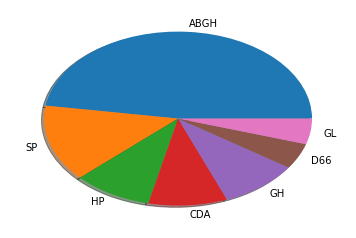

ABGH    10
SP       3
HP       2
CDA      2
GH       2
D66      1
GL       1
Name: Partij, dtype: int64


In [20]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST14[uitslag.ABGH==1].sum(),uitslag.ST14[uitslag.CDA==1].sum(),uitslag.ST14[uitslag.PH==1].sum(),uitslag.ST14[uitslag.GH==1].sum(),uitslag.ST14[uitslag.PVDA==1].sum(),uitslag.ST14[uitslag.VVD==1].sum(),uitslag.ST14[uitslag.SP==1].sum(),uitslag.ST14[uitslag.HP==1].sum(),uitslag.ST14[uitslag.GL==1].sum(),uitslag.ST14[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.14. Hengstdijk

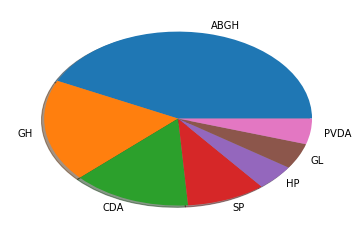

ABGH    9
GH      4
CDA     3
SP      2
HP      1
GL      1
PVDA    1
Name: Partij, dtype: int64


In [21]:
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST15[uitslag.ABGH==1].sum(),uitslag.ST15[uitslag.CDA==1].sum(),uitslag.ST15[uitslag.PH==1].sum(),uitslag.ST15[uitslag.GH==1].sum(),uitslag.ST15[uitslag.PVDA==1].sum(),uitslag.ST15[uitslag.VVD==1].sum(),uitslag.ST15[uitslag.SP==1].sum(),uitslag.ST15[uitslag.HP==1].sum(),uitslag.ST15[uitslag.GL==1].sum(),uitslag.ST15[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

## 3. Model

In this section, we will investigate the relationship between the living place of a candidate and the total votes one receives. Our workhorse in doing this will be a linear regression model.

However, the living place is not the only variable that influences the decision of a voter. Therefore, it is necessary to determine some additional variables. The first control variable that is used is a dummy variable for each party. This will result in a parameter for the influence of living place not being biased on the popularity of one specific party.

Secondly, we will also add dummy variables for earlier mandates. A mandate is considered to be either member of the municipality council right before the elections or being alderman. It is assumable that these will have a different popularity in voting than people without a mandate. Also, these variables correct for the presumption of experience, that will may be a reason to vote for a certain person.

The dependence factor measures how the voting in the own town depends on the total votes. Therefore, this is the inverse of the parameter, as depicted in the second equation below.

The model will look like this:

\begin{equation*}
total\ \ votes_iv = \beta_0 +\beta_1* votes \ \ own \ \ town + \beta_2 *  political \ \ party + \beta_3 *  member \ \ council \ \ 2014 + \beta_4 * \ \ alderman\ \ 2014 + \epsilon
\end{equation*}

\begin{equation*}
Dependendence \ \ factor = \frac{x}{y}= \frac{1}{\beta_1}
\end{equation*}

There are a lot more variables,  that may have an influence on the total number of votes. As mentioned in section 2.1.1., demographics are not taken into account since these are only statistics and we cannot combine them correct. Furthermore, there are a lot more  candidate characteristics that might influence a voters decision for that person. Since it would be impossible to include all these characteristics of the candidates (like occupation, hobby’s, number of beers given to people in the pub), this is not done.



## 4. Results

In [22]:
# Allowing for assumptions
uitslag = uitslag.replace(to_replace='Walsoorden', value= 'Kloosterzande')
uitslag = uitslag.replace(to_replace='Kuitaart', value= 'Lamswaarde')
uitslag = uitslag.replace(to_replace='Kapellebrug', value= 'Sint Jansteen')
uitslag = uitslag.replace(to_replace='Vlissingen', value= 'Other')
uitslag = uitslag.replace(to_replace='Koewacht', value = 'Other')
uitslag = uitslag.replace(to_replace='Zaamslag', value= 'Other')
# Create dummy for living place
dummies = pd.get_dummies(uitslag['Woonplaats'])
uitslag = uitslag.merge(dummies, left_index=True, right_index= True)
#Clean a bit
uitslag = uitslag.rename(columns={'Nieuw-Namen': 'NieuwNamen', 'Sint Jansteen': 'SintJansteen'})

In [23]:
uitslag['votes in own village']=uitslag.Hulst_x*uitslag.Hulst_y + uitslag.Clinge*uitslag.ST5 +uitslag.NieuwNamen*uitslag.ST6 +uitslag.Graauw*uitslag.ST7+uitslag.SintJansteen*uitslag.ST8+uitslag.Heikant*uitslag.ST9+uitslag.Kloosterzande*uitslag.ST10+uitslag.Lamswaarde*uitslag.ST11+uitslag.Terhole*uitslag.ST12+uitslag.Vogelwaarde*uitslag.ST13+uitslag.Ossenisse*uitslag.ST14+uitslag.Hengstdijk*uitslag.ST15

In [25]:
import statsmodels.api as sm
X= uitslag[['votes in own village', 'ABGH' , 'CDA', 'D66', 'GH' , 'GL', 'HP', 'PH', 'PVDA', 'SP','VVD', 'Lid',  'Wethouder']]
Y= uitslag['Totaal']
X= sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Totaal   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     84.26
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           7.71e-64
Time:                        18:14:58   Log-Likelihood:                -958.90
No. Observations:                 178   AIC:                             1944.
Df Residuals:                     165   BIC:                             1985.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4603      4.605      2.489      0.014       2.368      20.553
votes in own village     1.4440      0.117     12.383      0.000       1.214       1.674
ABGH                    18.3677     10.756      1.708      0.090      -2.869      39.604
CDA                    -10.2158     11.180     -0.914      0.362     -32.289      11.858
D66                     11.5778     16.286      0.711      0.478     -20.578      43.734
GH                     -18.4374      9.759     -1.889      0.061     -37.707       0.832
GL                      25.8504     18.080      1.430      0.155      -9.847      61.548
HP                      18.5838     13.587      1.368      0.173      -8.242      45.410
PH                      -4.3405     14.526     -0.299      0.765     -33.021      24.340
PVDA                   -27.9055     12.836     -2.174      0.031     -53.249      -2.562
SP                      10.1911     12.452      0.818      0.414     -14.394      34.776
VVD                    -12.2112     13.463     -0.907      0.366     -38.793      14.371
Lid                     85.0304     16.069      5.291      0.000      53.302     116.758
Wethouder              392.6962     38.046     10.322      0.000     317.577     467.815
==============================================================================
Omnibus:                      112.661   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2342.272
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      20.374   Cond. No.                     2.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
Dependence= 1/1.4440
print(Dependence)

0.6925207756232687


## 5. Discussion & Conclusion

Although this model gives an estimation of the dependence of the candidate’s living place on the voting behaviour, the assumptions that has been made remain very important. Therefore, it would be dangerous to take the dependence ratio of 69% as full truth. However, it still tells us that the living place remain a very important factor.

An important assumption that has been made, is that every citizen votes in his or her own village. However, it is unlikely that everyone does this. Another important assumption that has been made is the excluding of a lot of control variables, since they were simply impossible to measure. By doing a shadow poll, one could find out more about these control variables. Of course, this method also has its disadvantages.